1. Install Required Libraries

In [1]:
!pip install pandas scikit-learn xgboost matplotlib seaborn --quiet


2. Import Python Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier, plot_importance


3. Load Dataset from UCI Repository

In [3]:
# Load dataset from UCI repository (or use your downloaded file path)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz"
columns = [
    'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points'
] + [f'Wilderness_Area_{i}' for i in range(4)] + [f'Soil_Type_{i}' for i in range(40)] + ['Cover_Type']

df = pd.read_csv(url, header=None, names=columns)
df.head()


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


4. Data Preprocessing (Features, Target, Train-Test Split, Scaling)

In [4]:
# Features and target
X = df.drop("Cover_Type", axis=1)
y = df["Cover_Type"]

# Fix class labels to start from 0 (XGBoost requires this)
y = y - 1  # Now classes are [0, 1, ..., 6]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


5. Train XGBoost Classifier

In [5]:
model = XGBClassifier(
    objective='multi:softmax',
    num_class=7,
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)

model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [15:01:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=7, ...)

6. Model Evaluation (Accuracy, Classification Report, Confusion Matrix)

✅ Accuracy: 0.8711823274786366

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85     42557
           1       0.87      0.90      0.88     56500
           2       0.90      0.91      0.91      7121
           3       0.91      0.86      0.89       526
           4       0.89      0.59      0.71      1995
           5       0.85      0.82      0.83      3489
           6       0.94      0.92      0.93      4015

    accuracy                           0.87    116203
   macro avg       0.89      0.83      0.86    116203
weighted avg       0.87      0.87      0.87    116203



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


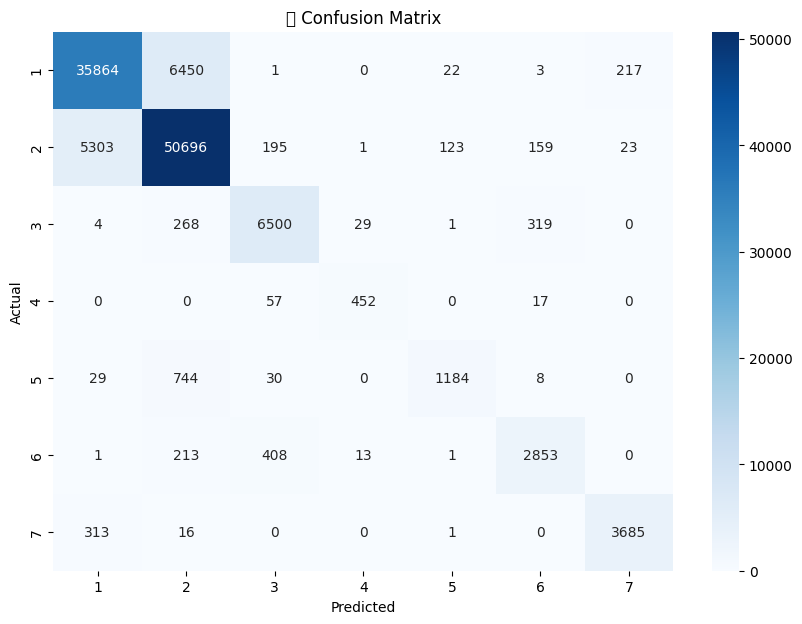

In [6]:
# Predict
y_pred = model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("✅ Accuracy:", acc)

# Classification report
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(1, 8), yticklabels=range(1, 8))
plt.title("🧩 Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


7. Feature Importance Visualization

<Figure size 1200x600 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


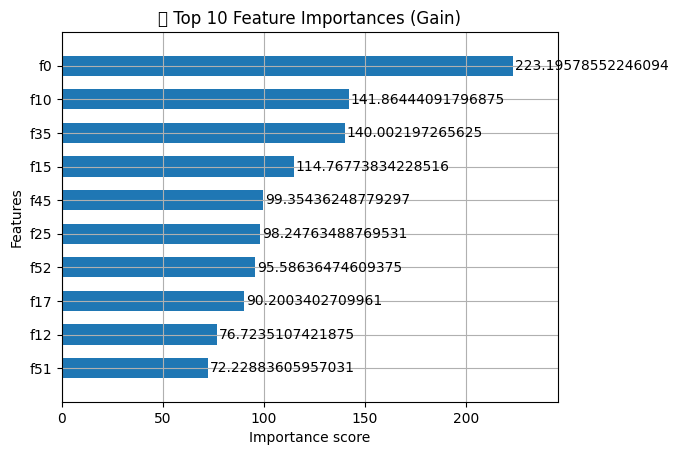

In [7]:
plt.figure(figsize=(12, 6))
plot_importance(model, max_num_features=10, importance_type="gain", height=0.6)
plt.title("🔍 Top 10 Feature Importances (Gain)")
plt.show()


8. Install Streamlit, SHAP & Pyngrok, and Clean Previous Sessions

In [8]:
!pip install streamlit shap pyngrok  --quiet
!pkill -f streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 98.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 97.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.1 MB/s eta 0:00:00


9. Install UCI ML Repo Library

In [9]:
!pip install ucimlrepo


10. Build Streamlit App – forest_cover_classification_app.py

In [10]:
%%writefile forest_cover_classification_app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
from ucimlrepo import fetch_ucirepo

# Step 1: Load dataset using ucimlrepo
@st.cache_data
def load_data():
    covertype = fetch_ucirepo(id=31)
    X = covertype.data.features
    y = covertype.data.targets

    df = pd.concat([X, y], axis=1)

    # Rename target column and make it 0-based
    if 'Cover_Type' in df.columns:
        df['Cover_Type'] = df['Cover_Type'] - 1

    return df

# Step 2: Prepare features and target
def preprocess_data(df):
    X = df.drop('Cover_Type', axis=1)
    y = df['Cover_Type']
    return train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train model
def train_model(X_train, y_train):
    model = XGBClassifier(objective='multi:softmax',
                          num_class=7,
                          eval_metric='mlogloss',
                          use_label_encoder=False)
    model.fit(X_train, y_train)
    return model

# Step 4: Plot confusion matrix
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    st.pyplot(plt)

# Streamlit UI
st.title("🌲 Forest Cover Type Classification")

df = load_data()
st.subheader("📊 Raw Dataset")
st.dataframe(df.head())

# Data splitting
X_train, X_test, y_train, y_test = preprocess_data(df)

# Train model
model = train_model(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
st.subheader("📈 Classification Report")
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
st.dataframe(report_df)

# Confusion Matrix
st.subheader("🔍 Confusion Matrix")
plot_confusion_matrix(y_test, y_pred)

# Feature Importance
st.subheader("📌 Feature Importance")
importance = model.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=importance_df.head(15), x='Importance', y='Feature', palette='viridis', ax=ax)
plt.title("Top 15 Important Features")
st.pyplot(fig)


Writing forest_cover_classification_app.py


11. Reinstall Streamlit and Pyngrok (if needed)

In [11]:
!pip install streamlit pyngrok --quiet


12. Set ngrok Authtoken

In [12]:
from pyngrok import conf
conf.get_default().auth_token = "YOUR_TOKEN_HERE"

13. Run Streamlit App with ngrok Tunnel

In [13]:
# Run Streamlit app in background (suppressing output)
!streamlit run forest_cover_classification_app.py &> /dev/null &

# Wait for Streamlit to boot up
import time
time.sleep(5)

# Connect to ngrok
from pyngrok import ngrok

# Optional: Kill previous tunnels if any (avoid ERR_NGROK_108)
!pkill -f ngrok

# Open public URL
public_url = ngrok.connect(8501)
print("🌐 Your Streamlit app is live at:", public_url)


🌐 Your Streamlit app is live at: NgrokTunnel: "https://56c65eccf55f.ngrok-free.app" -> "http://localhost:8501"
